In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
mpl.rc('font', family='Malgun Gothic')

In [3]:
df_member = pd.read_csv('Member_Data.csv', encoding='EUC-KR')
df_product = pd.read_csv('Product_Data.csv')
df_sales = pd.read_csv('Sales_Data05.csv')

# 1
: 고객별 연령대, 거주지, 구매빈도, 구매금액, 구매제품종류(중분류, 소분류, 제품번호 등 다양한 범위에서) 등의 데이터에서 고객 그룹에 대한 특징을 파악[군집분석, RFM분석 등]하고 비슷한 고객 군집 생성해 고객 유형을 설정.

# RMF 분석

In [112]:
# 날짜 변환
df_sales['주문일시'] = pd.to_datetime(df_sales['주문일시'], errors='coerce')
latest_date = df_sales['주문일시'].max()  # 데이터 내 최신 주문일

# RFM분석
rfm = pd.pivot_table(df_sales, index="회원번호",values=["주문일시", "구매금액"],
    aggfunc={"주문일시": [lambda x: (latest_date - x.max()).days, "count"], "구매금액": "sum"}).reset_index()

# 컬럼 이름 변경
rfm.columns = ["회원번호", "Recency", "Frequency", "Monetary"]

# RFM 점수 (5단계 )
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"], 5, labels=[1, 2, 3, 4, 5])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

# 최종 RFM 점수 계산
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)

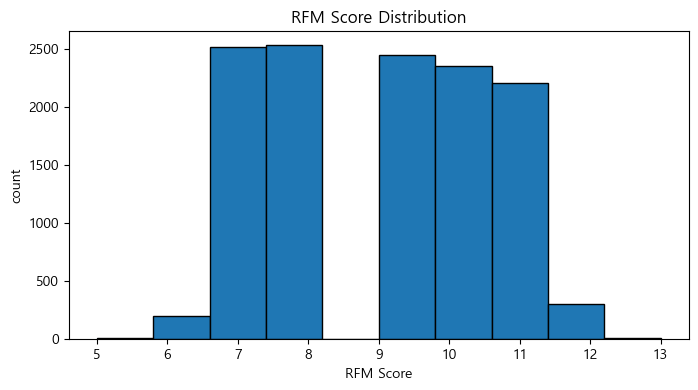

In [114]:
# RFM Score 분포 히스토그램
plt.figure(figsize=(8, 4))
plt.hist(rfm["RFM_Score"], edgecolor="black")
plt.title("RFM Score Distribution")
plt.xlabel("RFM Score")
plt.ylabel("count")
plt.show()

# 분집분석